In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
bp_data = pd.read_csv("../data/bodyPerformance.csv")
bp_data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [3]:
bp_data.loc[bp_data['gender'] == 'M', 'gender',] = 0
bp_data.loc[bp_data['gender'] == 'F', 'gender',] = 1
bp_data.loc[bp_data['class'] == 'A', 'class',] = 1
bp_data.loc[bp_data['class'] == 'B', 'class',] = 2
bp_data.loc[bp_data['class'] == 'C', 'class',] = 3
bp_data.loc[bp_data['class'] == 'D', 'class',] = 4
bp_data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,3
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,3
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,3
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,4
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,4


In [4]:
x = bp_data.drop('class', axis=1)
y = bp_data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [5]:
## XGB Classifier

bp_df_copy = bp_data.copy()

for i in bp_df_copy:
    if bp_df_copy[i].dtypes == 'object':
        bp_df_copy[i] = LabelEncoder().fit_transform(bp_df_copy[i])
        
bp_df_copy


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,3


In [6]:
X = bp_df_copy.drop('class', axis=1)
Y = bp_df_copy['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [7]:
xgb = XGBClassifier(random_state=101, verbosity=1)
xgb.fit(X_train, Y_train)
pred = xgb.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       631
           1       0.66      0.60      0.63       678
           2       0.73      0.71      0.72       691
           3       0.92      0.82      0.87       679

    accuracy                           0.75      2679
   macro avg       0.75      0.75      0.75      2679
weighted avg       0.75      0.75      0.75      2679



Text(0, 0.5, 'True Positive rate')

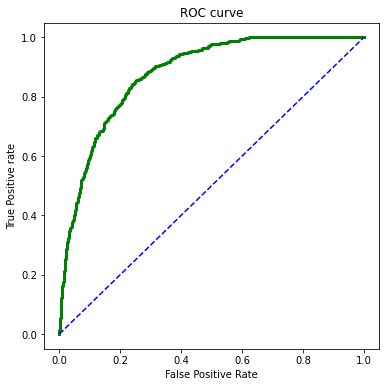

In [8]:
# ROC curve (receiver operating characteristic curve)
prob = xgb.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(Y_test, prob[:,1], pos_label=1)

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

plt.figure(figsize=[6, 6])
plt.plot(fpr, tpr, linestyle='-',color='green', label='XGBoost', linewidth=3)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

In [9]:
# Light GBM Light Gradient Boosting
lgb = LGBMClassifier(random_state=101)
lgb.fit(X_train, Y_train)
pred = lgb.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       631
           1       0.66      0.64      0.65       678
           2       0.74      0.68      0.71       691
           3       0.91      0.82      0.86       679

    accuracy                           0.76      2679
   macro avg       0.76      0.76      0.76      2679
weighted avg       0.76      0.76      0.75      2679



In [10]:
# prob = lgb.predict_proba(X_test)
# fpr, tpr, thresh = roc_curve(Y_test, prob[:,1], pos_label=1)

# random_probs = [0 for i in range(len(Y_test))]
# p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

# plt.figure(figsize=[6, 6])
# plt.plot(fpr, tpr, linestyle='-',color='green', label='LightBoost', linewidth=3)
# plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# plt.title('ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive rate')

In [11]:
# correlation
bp_df_copy.corr()["class"]

age                        0.065612
gender                    -0.075605
height_cm                  0.037753
weight_kg                  0.214129
body fat_%                 0.341956
diastolic                  0.066761
systolic                   0.035484
gripForce                 -0.136088
sit and bend forward_cm   -0.588123
sit-ups counts            -0.452832
broad jump_cm             -0.262154
class                      1.000000
Name: class, dtype: float64

In [12]:
# lgb.booster_.save_model('bpmodeldc.txt')

In [13]:
# Create pickle file
file = open('../models/body_performance_prediction3', 'wb') 

# Save the trained model to file
import pickle
pickle.dump(xgb, file)
file.close()